In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("zameen-updated.csv")
print(df.shape)
df.head()

(168446, 20)


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,4/5/2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [2]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


# Counting Null Values

In [3]:
# Null values in each column
null_values = df.isna().sum()
null_values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [4]:
# Missing values in each column
missing_values = df.isnull().sum()
missing_values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [5]:
#drop url column as not much need 
df = df.drop(["page_url","property_id"], axis = 1)

# Creating New Columns

In [6]:
#filling vacant space to 0
df.fillna(0)

# To Standardize area. Converting kanal to marla
kanal_to_marla = 20

def conversion(row):
    if row['Area Type'] == "Kanal":
        return row['Area Size'] * kanal_to_marla 
    elif row['Area Type'] == "Marla":
        return row['Area Size']

df['Area(Marla)'] = df.apply(conversion, axis=1)

#We are also extracting Date, Month, Year from Date to new columns (might needed in future)

df['date_added'] = pd.to_datetime(df["date_added"], format="%m/%d/%Y")

df.insert(14, "Day", df["date_added"].dt.day)
df.insert(15, "Month", df["date_added"].dt.month)
df.insert(16, "Year", df["date_added"].dt.year) #dt is accessor

df.head()

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,...,date_added,agency,Day,Month,Year,agent,Area Type,Area Size,Area Category,Area(Marla)
0,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,...,2019-02-04,NaN,4,2,2019,NaN,Marla,4.0,0-5 Marla,4.0
1,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,...,2019-05-04,NaN,4,5,2019,NaN,Marla,5.6,5-10 Marla,5.6
2,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,...,2019-07-17,NaN,17,7,2019,NaN,Marla,8.0,5-10 Marla,8.0
3,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,...,2019-04-05,NaN,5,4,2019,NaN,Kanal,2.0,1-5 Kanal,40.0
4,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,...,2019-07-10,Easy Property,10,7,2019,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla,8.0


# Cleaning Data

In [7]:
#Dropping Agency and agent column
df2 = df.drop(["agent","agency"], axis=1)

### By BedRoom and Baths

In [8]:
df2[(df2['baths']==0) | (df2['bedrooms']==0)]

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla)
12,3300,House,400000000,F-6,Islamabad,Islamabad Capital,33.731532,73.065696,0,4.5 Kanal,For Sale,0,2019-07-04,4,7,2019,Kanal,4.5,1-5 Kanal,90.0
19,424,Flat,1750000,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,0,1.5 Marla,For Sale,0,2019-06-13,13,6,2019,Marla,1.5,0-5 Marla,1.5
47,8,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,2019-07-17,17,7,2019,Kanal,6.0,5-10 Kanal,120.0
49,75,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,2019-07-03,3,7,2019,Marla,9.0,5-10 Marla,9.0
54,3749,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,0,1 Kanal,For Sale,5,2019-07-03,3,7,2019,Kanal,1.0,1-5 Kanal,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168440,6760,Flat,4800000,Gadap Town,Karachi,Sindh,25.022481,67.129082,0,3.8 Marla,For Sale,2,2019-07-18,18,7,2019,Marla,3.8,0-5 Marla,3.8
168441,6754,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,2019-07-18,18,7,2019,Marla,9.6,5-10 Marla,9.6
168442,680,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,2019-07-18,18,7,2019,Marla,8.0,5-10 Marla,8.0
168443,6757,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,2019-07-18,18,7,2019,Marla,9.6,5-10 Marla,9.6


In [9]:
#droping entries having no bed and baths
df2 = df2.drop(df2[(df2['baths']==0) | (df2['bedrooms']==0)].index)

In [10]:
df2[df2['bedrooms']>13]

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla)
28977,165,House,550000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,10,2.4 Kanal,For Rent,18,2019-06-13,13,6,2019,Kanal,2.4,1-5 Kanal,48.0
131218,6828,House,150000000,Gulistan-e-Jauhar,Karachi,Sindh,24.929252,67.136679,6,1.2 Kanal,For Sale,16,2019-07-04,4,7,2019,Kanal,1.2,1-5 Kanal,24.0
153821,3317,House,650000,F-8,Islamabad,Islamabad Capital,33.708954,73.045042,14,4 Kanal,For Rent,14,2019-07-15,15,7,2019,Kanal,4.0,1-5 Kanal,80.0


In [11]:
df2 = df2.drop(df2[df2['bedrooms'] > 13].index)
print(df2.shape)
df2['baths'].unique()

(125620, 20)


array([  2,   3,   6,   4,   8,   7,   5,   1,  10,   9,  11,  13,  12,
       403,  14], dtype=int64)

In [12]:
#We will also remove those having rooms > 3 and baths == 0, quite unusual
df2 = df2.drop(df2[(df2['baths']==0) & (df2['bedrooms'] > 3)].index)

In [13]:
#Also dropping for those having baths > (rooms+3)
df2[(df2['baths']) > (df2['bedrooms']+3)]

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla)
419,9438,Flat,32000,Askari 1,Rawalpindi,Punjab,33.581306,73.087962,7,10 Marla,For Rent,3,2019-05-06,6,5,2019,Marla,10.0,5-10 Marla,10.0
596,10663,Flat,15000000,DHA Defence,Islamabad,Islamabad Capital,33.539071,73.156333,8,12 Marla,For Sale,4,2019-06-13,13,6,2019,Marla,12.0,10-15 Marla,12.0
2752,3808,House,51000000,Gulberg,Lahore,Punjab,31.528068,74.347544,10,1 Kanal,For Sale,5,2018-09-06,6,9,2018,Kanal,1.0,1-5 Kanal,20.0
3000,4984,House,20000000,Lasani Garden,Faisalabad,Punjab,31.457771,73.071649,8,6 Marla,For Sale,4,2019-07-17,17,7,2019,Marla,6.0,5-10 Marla,6.0
3775,9586,House,95000000,Cantt,Karachi,Sindh,24.959894,67.188631,10,1.1 Kanal,For Sale,6,2019-06-05,5,6,2019,Kanal,1.1,1-5 Kanal,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157468,1482,House,500000,DHA Defence,Karachi,Sindh,24.810265,67.043552,10,2 Kanal,For Rent,6,2019-07-15,15,7,2019,Kanal,2.0,1-5 Kanal,40.0
159721,3346,House,250000,G-14,Islamabad,Islamabad Capital,33.638228,72.953341,14,1.5 Kanal,For Sale,10,2019-07-16,16,7,2019,Kanal,1.5,1-5 Kanal,30.0
161541,12971,House,27500000,Scheme 33,Karachi,Sindh,24.969948,67.176168,9,9.6 Marla,For Sale,5,2019-07-17,17,7,2019,Marla,9.6,5-10 Marla,9.6
162777,570,Flat,540000,Gadap Town,Karachi,Sindh,25.050147,67.026100,6,2.8 Marla,For Sale,2,2019-07-17,17,7,2019,Marla,2.8,0-5 Marla,2.8


In [14]:
df2 = df2.drop(df2[df2['baths']>(df2['bedrooms']+3)].index)
df2.shape

(125493, 20)

### Outliers 

In [15]:
#No. of Non-duplicates (location key)
values_after_deduplication = df['location_id'].nunique() 
print(values_after_deduplication)

4198


Droping entries having price < 3000 For Rent and price <100000 For Sale

In [16]:
df2 = df2.drop(df2[df2['price']<3000].index)

In [17]:
pd.set_option('display.max_columns', None)
df2 = df2.drop(df2[(df2['price']<100000) & (df2['purpose']=='For Sale')].index) 

In [18]:
#Removing those having Area(marla) == 0
df2 = df2.drop(df2[df2['Area(Marla)']==0].index)

We will create another column 'price per marla', so that we can compare it with HomeTown avg. price, to remove outliers

In [19]:
df2['Price per Marla'] = df2['price'] / df2['Area(Marla)']

In [20]:
#Droping price (marla) > 6,000,000
df2 = df2.drop(df2[df2['Price per Marla']>6000000].index)

In [21]:
len(df['location'].unique())

1509

In [22]:
#Removing any leading or trailing whitespaces from each location entry
df['location'] = df['location'].apply(lambda x: x.strip()) 

#Count Occurence of each location value
location_stats = df2['location'].value_counts(ascending=False)

location_stats.head(40)

location
DHA Defence                   17228
Bahria Town Karachi            7865
Bahria Town Rawalpindi         6008
Bahria Town                    5486
Gulistan-e-Jauhar              4320
Gulshan-e-Iqbal Town           3570
E-11                           2371
Gadap Town                     2222
North Karachi                  2100
North Nazimabad                2095
Scheme 33                      2058
Cantt                          1937
G-13                           1849
F-11                           1567
Johar Town                     1522
G-11                           1495
Clifton                        1415
I-8                            1369
Malir                          1133
Federal B Area                 1113
G-15                           1087
Jamshed Town                   1056
F-10                           1045
F-8                             944
Nazimabad                       935
Askari                          933
F-7                             885
I-10               

But it is not mention which Bahria Town, Cantt or DHA Defence it is.
We will now concat city with each of them

In [23]:
locations = ["Bahria Town", "Askari", "DHA Defence","Gulberg"]
df2['location'] = np.where((df2['location'].isin(locations)), 
                              df2['location'] + ' ' + df2['city'],
                              df2['location'])

In [24]:
#Count Occurence of each location value Once Again
location_stats = df2['location'].value_counts(ascending=False)

location_stats.head(40)

location
Bahria Town Karachi           7865
DHA Defence Karachi           7632
DHA Defence Lahore            6747
Bahria Town Rawalpindi        6008
Gulistan-e-Jauhar             4320
Bahria Town Lahore            4278
Gulshan-e-Iqbal Town          3570
DHA Defence Islamabad         2849
E-11                          2371
Gadap Town                    2222
North Karachi                 2100
North Nazimabad               2095
Scheme 33                     2058
Cantt                         1937
G-13                          1849
F-11                          1567
Johar Town                    1522
G-11                          1495
Clifton                       1415
I-8                           1369
Bahria Town Islamabad         1208
Malir                         1133
Federal B Area                1113
G-15                          1087
Jamshed Town                  1056
F-10                          1045
F-8                            944
Nazimabad                      935
Askari Laho

Crating 2 Seperate dataFrame For Sale and For Rent

In [25]:
df_sale = df2[df2["purpose"]== "For Sale"]
df_rent = df2[df2["purpose"]== "For Rent"]
df_rent

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla),Price per Marla
35,3190,House,110000,DHA Defence Islamabad,Islamabad,Islamabad Capital,33.542039,73.093414,5,1 Kanal,For Rent,5,2018-10-20,20,10,2018,Kanal,1.0,1-5 Kanal,20.0,5500.000000
36,165,House,600000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,6,2 Kanal,For Rent,6,2018-10-20,20,10,2018,Kanal,2.0,1-5 Kanal,40.0,15000.000000
37,3349,Lower Portion,33000,G-15,Islamabad,Islamabad Capital,33.633416,72.918220,2,8 Marla,For Rent,2,2018-10-20,20,10,2018,Marla,8.0,5-10 Marla,8.0,4125.000000
38,1378,House,45000,Pakistan Town,Islamabad,Islamabad Capital,33.575405,73.143325,5,1.2 Kanal,For Rent,3,2019-07-11,11,7,2019,Kanal,1.2,1-5 Kanal,24.0,1875.000000
39,156,Upper Portion,12000,Bhara kahu,Islamabad,Islamabad Capital,33.737402,73.179159,2,5 Marla,For Rent,2,2019-02-04,4,2,2019,Marla,5.0,0-5 Marla,5.0,2400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168345,174,Upper Portion,115000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,3,1 Kanal,For Rent,4,2019-07-18,18,7,2019,Kanal,1.0,1-5 Kanal,20.0,5750.000000
168346,424,Lower Portion,45000,PWD Housing Scheme,Islamabad,Islamabad Capital,33.570792,73.145256,3,12 Marla,For Rent,3,2019-07-18,18,7,2019,Marla,12.0,10-15 Marla,12.0,3750.000000
168347,165,House,400000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,6,1.3 Kanal,For Rent,5,2019-07-18,18,7,2019,Kanal,1.3,1-5 Kanal,26.0,15384.615385
168349,3241,House,100000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,7,3.2 Kanal,For Rent,5,2019-07-18,18,7,2019,Kanal,3.2,1-5 Kanal,64.0,1562.500000


In [26]:
def identify_outliers(group):
    #Droping value, Lower Bound = 10th Percentile & Upper Bound = 90th Perc
    Q1 = group['Price per Marla'].quantile(0.10)
    Q3 = group['Price per Marla'].quantile(0.90)
    IQR = Q3 - Q1
    return group[(group['Price per Marla'] >= Q1 - 1.5 * IQR) & 
                 (group['Price per Marla'] <= Q3 + 1.5 * IQR)]


# Apply the filter_outliers function to each group of locations
df_sale = df_sale.groupby('location').apply(identify_outliers)
df_rent = df_rent.groupby('location').apply(identify_outliers)

# Reset the index of the resulting DataFrame
df_sale.reset_index(drop=True, inplace=True)
df_rent.reset_index(drop=True, inplace=True)

df_rent

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla),Price per Marla
0,12288,Penthouse,40000,12th Avenue,Islamabad,Islamabad Capital,33.624151,72.996002,4,10 Marla,For Rent,4,2019-03-06,6,3,2019,Marla,10.0,5-10 Marla,10.0,4000.000000
1,9511,House,35000,204 Chak Road,Faisalabad,Punjab,31.404153,73.136959,4,5 Marla,For Rent,3,2018-11-19,19,11,2018,Marla,5.0,0-5 Marla,5.0,7000.000000
2,3104,Flat,90000,7th Avenue,Islamabad,Islamabad Capital,33.718646,73.070927,2,6.4 Marla,For Rent,2,2019-07-04,4,7,2019,Marla,6.4,5-10 Marla,6.4,14062.500000
3,3104,House,1000000,7th Avenue,Islamabad,Islamabad Capital,33.718646,73.070927,8,2 Kanal,For Rent,8,2019-07-04,4,7,2019,Kanal,2.0,1-5 Kanal,40.0,25000.000000
4,3104,Room,17000,7th Avenue,Islamabad,Islamabad Capital,33.718647,73.070930,1,5 Marla,For Rent,2,2019-07-17,17,7,2019,Marla,5.0,0-5 Marla,5.0,3400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32546,1499,Flat,40000,Zero Point,Islamabad,Islamabad Capital,33.693798,73.065130,2,6.1 Marla,For Rent,3,2019-07-02,2,7,2019,Marla,6.1,5-10 Marla,6.1,6557.377049
32547,1499,Flat,40000,Zero Point,Islamabad,Islamabad Capital,33.693798,73.065130,2,6.1 Marla,For Rent,3,2019-07-16,16,7,2019,Marla,6.1,5-10 Marla,6.1,6557.377049
32548,1499,Flat,40000,Zero Point,Islamabad,Islamabad Capital,33.693798,73.065130,2,6.1 Marla,For Rent,3,2019-07-16,16,7,2019,Marla,6.1,5-10 Marla,6.1,6557.377049
32549,1081,House,80000,Zia Colony,Faisalabad,Punjab,31.441479,73.142581,4,1.2 Kanal,For Rent,6,2018-10-20,20,10,2018,Kanal,1.2,1-5 Kanal,24.0,3333.333333


### Droping Duplicates
There are unusual duplicate values in this Dataset.
We will drop these with location_key,

In [27]:
#No. of Non-duplicates (location key)
values_after_deduplication = df_rent['location_id'].nunique() 
print("df_Rent:", values_after_deduplication)

values_after_deduplication = df_sale['location_id'].nunique() 
print("df_sale:", values_after_deduplication)

df_Rent: 1433
df_sale: 3821


We will retain only 1 value for each location, although there might be more than 1 entries for same location (As there are many portions in Flats)

In [28]:
#TO KEEP ONLY LATEST ENTRY FOR A LOCATION
#Sort it by date and pick up the latest one

df_sale['date_added'] = pd.to_datetime(df_sale['date_added']) 
df_sale = df_sale.sort_values(by=['location_id', 'date_added'], ascending=[True, False])
df_sale = df_sale.drop_duplicates(subset='location_id', keep='first')
df_sale

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla),Price per Marla
67415,1,House,11000000,"Lahore, Punjab",Lahore,Punjab,31.545771,74.341328,3,5 Marla,For Sale,3,2019-06-20,20,6,2019,Marla,5.0,0-5 Marla,5.0,2.200000e+06
65422,2,House,12000000,"Karachi, Sindh",Karachi,Sindh,24.862336,67.013893,4,4.8 Marla,For Sale,4,2019-04-06,6,4,2019,Marla,4.8,0-5 Marla,4.8,2.500000e+06
62040,3,Flat,4300000,"Islamabad, Islamabad Capital",Islamabad,Islamabad Capital,33.749464,73.061142,1,1.7 Marla,For Sale,1,2019-04-05,5,4,2019,Marla,1.7,0-5 Marla,1.7,2.529412e+06
50884,4,House,33000000,Garden Town,Lahore,Punjab,31.503922,74.323139,6,10 Marla,For Sale,5,2019-07-18,18,7,2019,Marla,10.0,5-10 Marla,10.0,3.300000e+06
26934,5,Flat,9000000,Clifton,Karachi,Sindh,24.825028,67.031579,2,4.8 Marla,For Sale,2,2019-07-18,18,7,2019,Marla,4.8,0-5 Marla,4.8,1.875000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,14104,Flat,4500000,Bahria Town Islamabad,Islamabad,Islamabad Capital,33.688312,73.211490,1,2.7 Marla,For Sale,1,2019-07-01,1,7,2019,Marla,2.7,0-5 Marla,2.7,1.666667e+06
52548,14130,Flat,1715000,Gulberg Islamabad,Islamabad,Islamabad Capital,33.612100,73.191100,1,2.7 Marla,For Sale,1,2019-07-12,12,7,2019,Marla,2.7,0-5 Marla,2.7,6.351852e+05
29738,14141,House,15600000,DHA Defence Islamabad,Islamabad,Islamabad Capital,33.501383,73.141996,2,5 Marla,For Sale,2,2019-07-09,9,7,2019,Marla,5.0,0-5 Marla,5.0,3.120000e+06
65480,14143,Flat,13800000,Kashmir Highway,Islamabad,Islamabad Capital,33.601515,72.889499,1,3.4 Marla,For Sale,1,2019-07-15,15,7,2019,Marla,3.4,0-5 Marla,3.4,4.058824e+06


In [29]:
df_rent['date_added'] = pd.to_datetime(df_rent['date_added']) 
df_rent = df_rent.sort_values(by=['location_id', 'date_added'], ascending=[True, False])
df_rent = df_rent.drop_duplicates(subset='location_id', keep='first')
df_rent

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla),Price per Marla
6452,5,Flat,42000,Clifton,Karachi,Sindh,24.825028,67.031579,3,1.6 Marla,For Rent,3,2019-07-18,18,7,2019,Marla,1.6,0-5 Marla,1.6,26250.000000
29834,11,Lower Portion,18000,North Nazimabad,Karachi,Sindh,24.933144,67.033167,2,4 Marla,For Rent,2,2019-07-18,18,7,2019,Marla,4.0,0-5 Marla,4.0,4500.000000
19170,12,House,25000,Federal B Area,Karachi,Sindh,24.928630,67.064466,2,4.8 Marla,For Rent,2,2019-07-04,4,7,2019,Marla,4.8,0-5 Marla,4.8,5208.333333
24526,13,Upper Portion,60000,Gulshan-e-Iqbal Town,Karachi,Sindh,24.895312,67.117238,3,8 Marla,For Rent,3,2019-07-18,18,7,2019,Marla,8.0,5-10 Marla,8.0,7500.000000
5182,156,Room,6000,Bhara kahu,Islamabad,Islamabad Capital,33.737885,73.173958,1,1 Marla,For Rent,1,2019-07-17,17,7,2019,Marla,1.0,0-5 Marla,1.0,6000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31625,13851,Lower Portion,36000,Scheme 33,Karachi,Sindh,24.954046,67.112567,3,8 Marla,For Rent,3,2019-07-13,13,7,2019,Marla,8.0,5-10 Marla,8.0,4500.000000
31645,13852,Lower Portion,45000,Scheme 33,Karachi,Sindh,24.954834,67.117364,3,16 Marla,For Rent,3,2019-07-17,17,7,2019,Marla,16.0,15-20 Marla,16.0,2812.500000
31599,13853,Lower Portion,60000,Scheme 33,Karachi,Sindh,24.957400,67.116575,3,8.8 Marla,For Rent,3,2019-07-04,4,7,2019,Marla,8.8,5-10 Marla,8.8,6818.181818
4659,13866,Flat,30000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.556316,73.136777,1,2.7 Marla,For Rent,1,2019-07-16,16,7,2019,Marla,2.7,0-5 Marla,2.7,11111.111111


In [30]:
#Count Occurence of each location value in Sale df
location_stats_sale = df_sale['location'].value_counts(ascending=False)

location_stats_sale.head(40)

location
DHA Defence Lahore          125
Scheme 33                    97
Bahria Town Rawalpindi       88
Gadap Town                   72
Gulshan-e-Iqbal Town         70
Cantt                        62
Bahria Town Lahore           60
Bahria Town Karachi          49
Johar Town                   47
Gulistan-e-Jauhar            46
North Karachi                44
DHA Defence Karachi          44
DHA Defence Islamabad        43
Gulberg Lahore               41
North Nazimabad              37
Wapda Town                   34
Korangi                      33
Malir                        32
Jamshed Town                 30
Allama Iqbal Town            30
Bahria Town Islamabad        27
New Karachi                  26
GT Road                      25
Federal B Area               25
Valencia Housing Society     24
Liaquatabad                  23
E-11                         22
Model Town                   22
Gulberg Islamabad            21
Eden                         19
Askari Lahore                18

In [31]:
#Count Occurence of each location value in rent df
location_stats_rent = df_rent['location'].value_counts(ascending=False)

location_stats_rent.head(40)

location
Bahria Town Rawalpindi    80
Gulshan-e-Iqbal Town      58
DHA Defence Karachi       45
DHA Defence Islamabad     42
Scheme 33                 36
Gulistan-e-Jauhar         33
North Karachi             30
North Nazimabad           29
E-11                      23
Federal B Area            22
Gadap Town                18
Jamshed Town              18
Cantt                     17
Malir                     17
Korangi                   16
Bahria Town Islamabad     16
Bahria Town Karachi       16
Clifton                   15
F-11                      12
Soan Garden               11
Ghauri Town               11
Bin Qasim Town             9
Gulberg Islamabad          9
G-15                       9
G-11                       9
B-17                       9
Nazimabad                  9
F-7                        9
Wapda City                 8
Satiana Road               8
Shah Faisal Town           8
G-13                       8
Naval Anchorage            8
F-10                       8
Satel

# Data Visualize

In [32]:
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
%matplotlib inline

## Street Map

In [33]:
min_value = df_sale['Price per Marla'].min()
max_value = df_sale['Price per Marla'].max()

fig = px.scatter_mapbox(
    df_sale,
    lat="latitude",
    lon="longitude",
    hover_name="location_id",
    hover_data = ["property_type","price","location"],
    color="Price per Marla",
    range_color=(min_value, max_value),
    zoom=10
)

fig.update_layout(mapbox_style="open-street-map")
pio.show(fig, renderer="browser")

## Rooms vs Price Per Marla Plot (of Specific Location)

In [34]:
def scatter_chart(df, location):
    One_Four_Beds = df[(df['location'] == location) & (df['bedrooms'] >= 1) & (df['bedrooms'] <= 4)]
    Four_plus_Beds = df[(df['location'] == location) & (df['bedrooms'] > 4)]

    plt.scatter(One_Four_Beds['Area(Marla)'], One_Four_Beds['price']/100000, color='blue', label="1 to 4 Bedrooms", s=50)
    plt.scatter(Four_plus_Beds ['Area(Marla)'], Four_plus_Beds['price']/100000, marker='+', color="green", label="4+ Bedrooms", s=50)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.xlabel("Size per Marla")
    plt.ylabel("Price (Lac)")
    plt.title(location)
    plt.legend()

### For Sale House

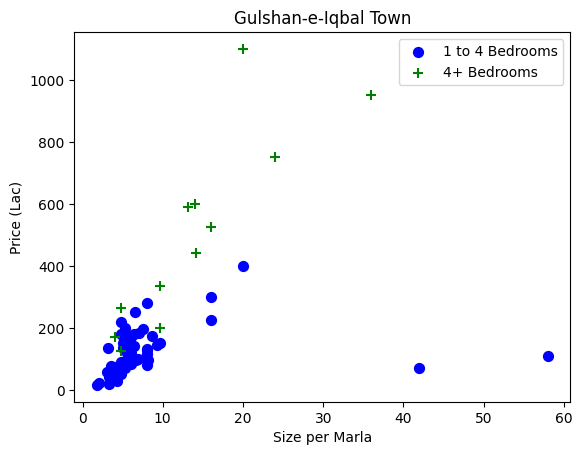

In [35]:
scatter_chart(df_sale, "Gulshan-e-Iqbal Town")

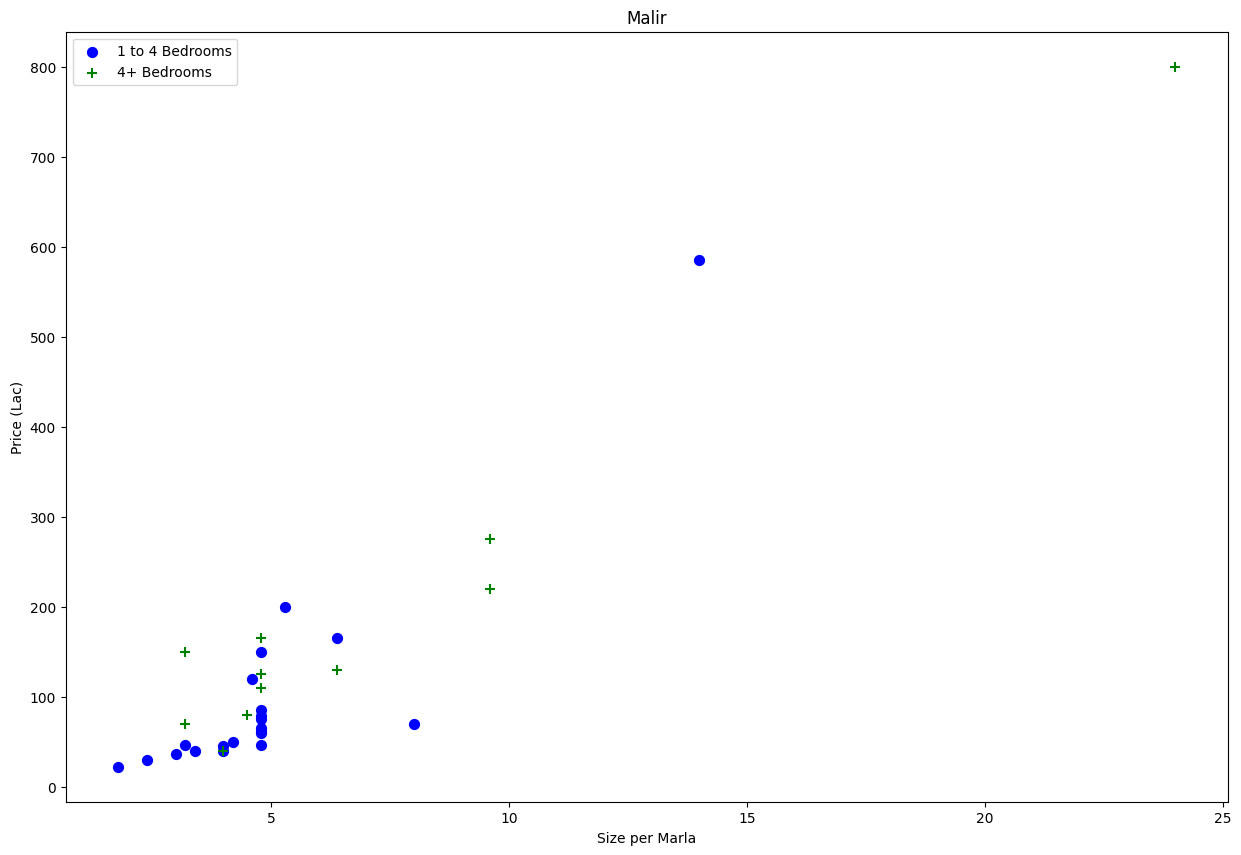

In [36]:
scatter_chart(df_sale, "Malir")

### For Rent

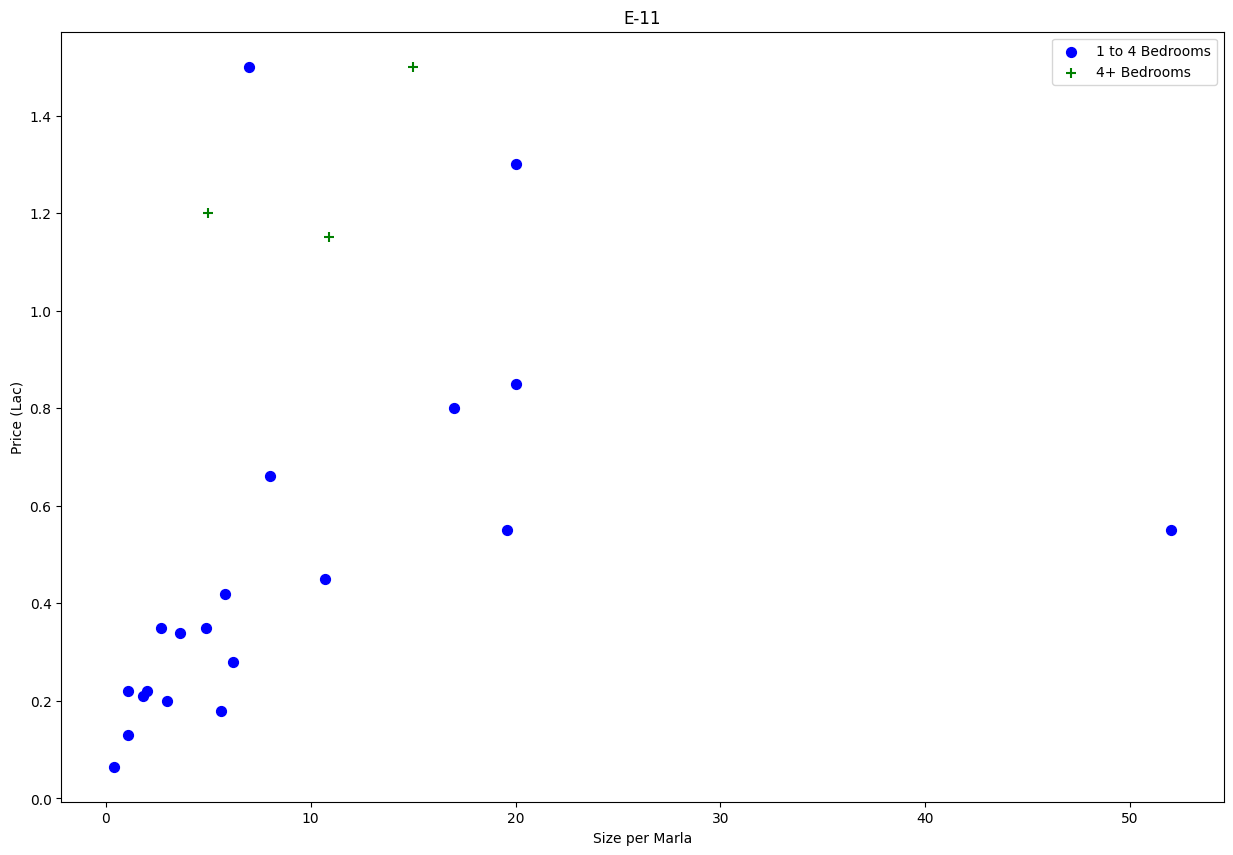

In [37]:
scatter_chart(df_rent, "E-11")

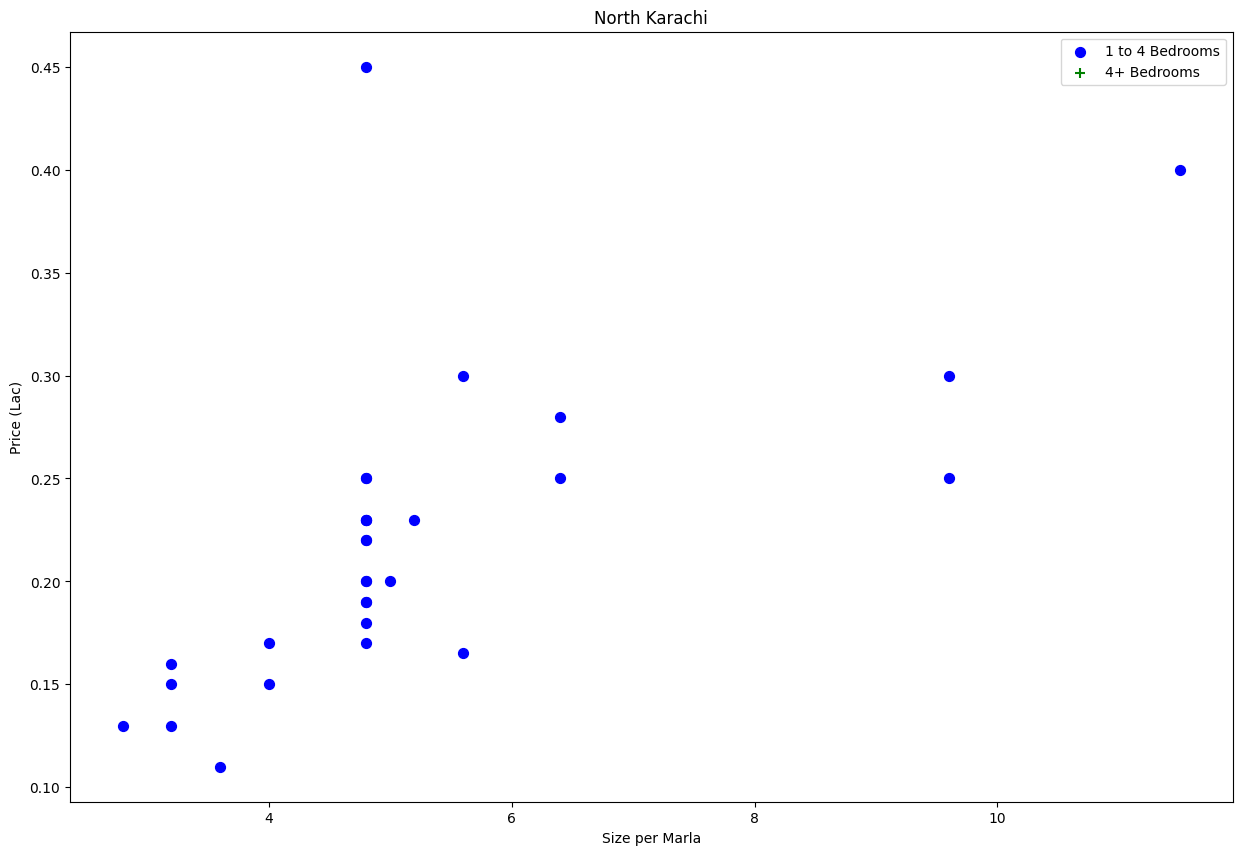

In [38]:
scatter_chart(df_rent, "North Karachi")

## Plotting Most Expensive Locations in each City

In [39]:
def expensive_locations(dataset, city_name):
    # Dataset for the specified city
    df_city = dataset[dataset['city'] == city_name]

    counts = df_city['location'].value_counts()

    # Only locations with more than 5 entries
    valid_locations = counts[counts > 5].index
    df_city = df_city[df_city['location'].isin(valid_locations)]

    # Calculate avg price per Marla
    df_expensive = df_city.groupby('location')['price'].mean().reset_index()

    # Sorting locations by avg price in descending order
    df_expensive = df_expensive.sort_values(by='price', ascending=False)

    # Selecting only the top most expensive locations
    df_top_locations = df_expensive.head(15)

    plt.bar(df_top_locations['location'], df_top_locations['price'] / 100000, color='skyblue')
    plt.xlabel('Location')
    plt.ylabel('Average Price per Marla (Lac)')
    plt.title(f' in {city_name}', fontsize=15)
    plt.xticks(rotation=45, ha='right')

### For Sale

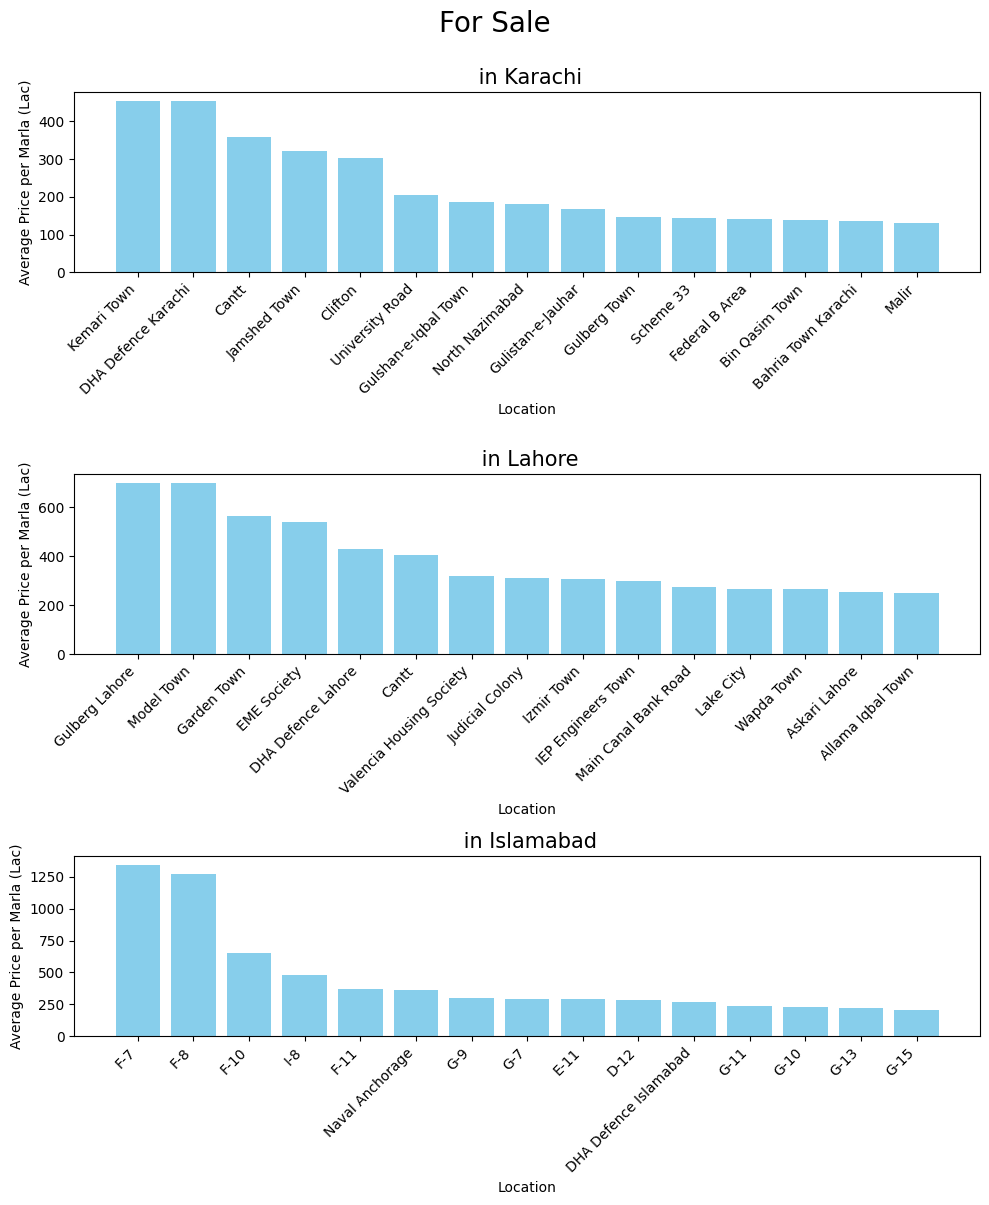

In [40]:
plt.figure(figsize=(10, 12))
plt.suptitle("For Sale", fontsize = 20, y=1)

plt.subplot(3, 1, 1)
expensive_locations(df_sale, 'Karachi')

plt.subplot(3, 1, 2)
expensive_locations(df_sale, 'Lahore')

plt.subplot(3, 1, 3)
expensive_locations(df_sale, 'Islamabad')

plt.tight_layout()
plt.show()

### For Rent

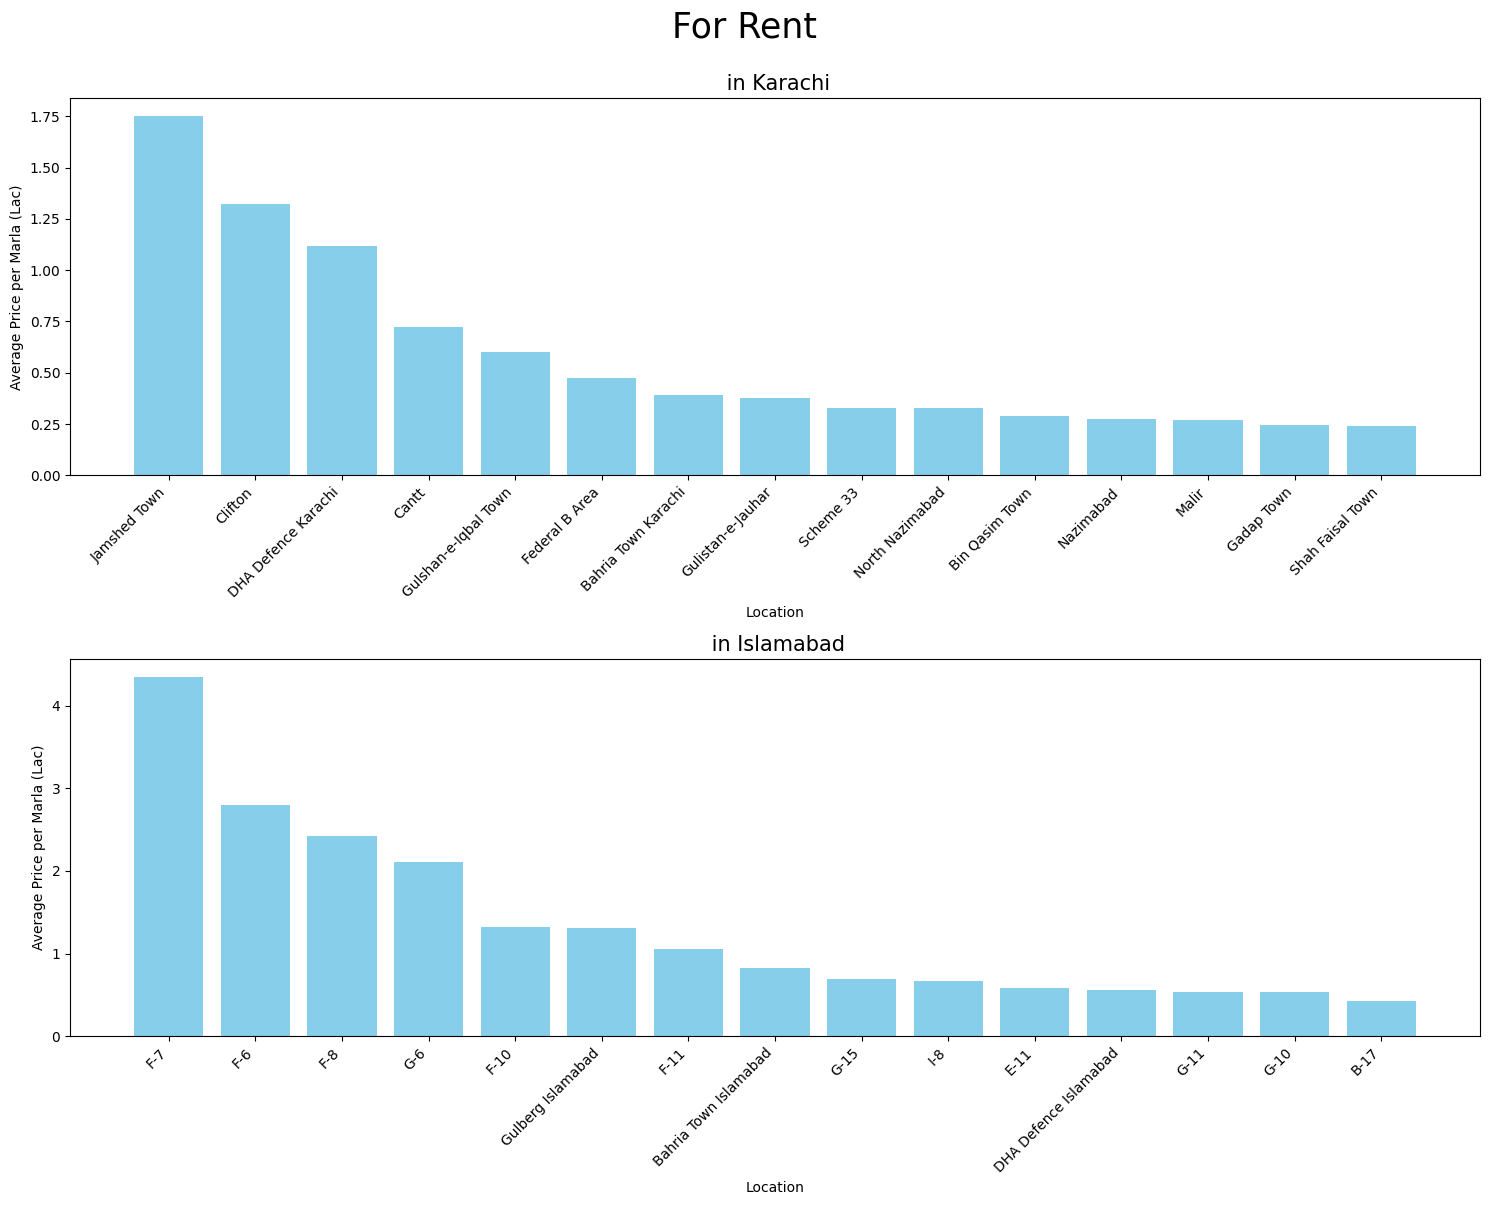

In [41]:
plt.figure(figsize=(15, 12))
plt.suptitle("For Rent", fontsize = 25, y=1, horizontalalignment='center')
plt.subplot(2, 1, 1)
expensive_locations(df_rent, 'Karachi')

plt.subplot(2, 1, 2)
expensive_locations(df_rent, 'Islamabad')

plt.tight_layout()
plt.show()

In [42]:
df_sale

,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Day,Month,Year,Area Type,Area Size,Area Category,Area(Marla),Price per Marla
67415,1,House,11000000,"Lahore, Punjab",Lahore,Punjab,31.545771,74.341328,3,5 Marla,For Sale,3,2019-06-20,20,6,2019,Marla,5.0,0-5 Marla,5.0,2.200000e+06
65422,2,House,12000000,"Karachi, Sindh",Karachi,Sindh,24.862336,67.013893,4,4.8 Marla,For Sale,4,2019-04-06,6,4,2019,Marla,4.8,0-5 Marla,4.8,2.500000e+06
62040,3,Flat,4300000,"Islamabad, Islamabad Capital",Islamabad,Islamabad Capital,33.749464,73.061142,1,1.7 Marla,For Sale,1,2019-04-05,5,4,2019,Marla,1.7,0-5 Marla,1.7,2.529412e+06
50884,4,House,33000000,Garden Town,Lahore,Punjab,31.503922,74.323139,6,10 Marla,For Sale,5,2019-07-18,18,7,2019,Marla,10.0,5-10 Marla,10.0,3.300000e+06
26934,5,Flat,9000000,Clifton,Karachi,Sindh,24.825028,67.031579,2,4.8 Marla,For Sale,2,2019-07-18,18,7,2019,Marla,4.8,0-5 Marla,4.8,1.875000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,14104,Flat,4500000,Bahria Town Islamabad,Islamabad,Islamabad Capital,33.688312,73.211490,1,2.7 Marla,For Sale,1,2019-07-01,1,7,2019,Marla,2.7,0-5 Marla,2.7,1.666667e+06
52548,14130,Flat,1715000,Gulberg Islamabad,Islamabad,Islamabad Capital,33.612100,73.191100,1,2.7 Marla,For Sale,1,2019-07-12,12,7,2019,Marla,2.7,0-5 Marla,2.7,6.351852e+05
29738,14141,House,15600000,DHA Defence Islamabad,Islamabad,Islamabad Capital,33.501383,73.141996,2,5 Marla,For Sale,2,2019-07-09,9,7,2019,Marla,5.0,0-5 Marla,5.0,3.120000e+06
65480,14143,Flat,13800000,Kashmir Highway,Islamabad,Islamabad Capital,33.601515,72.889499,1,3.4 Marla,For Sale,1,2019-07-15,15,7,2019,Marla,3.4,0-5 Marla,3.4,4.058824e+06


## Plotting Different Property Types

In [43]:
df_sale['property_type'].unique()

array(['House', 'Flat', 'Farm House', 'Lower Portion', 'Upper Portion',
       'Penthouse', 'Room'], dtype=object)

In [44]:
#df2[df2['property_type']=='Farm House']

### For Sale

In [45]:
df_sale_propTypes = df_sale['property_type'].value_counts()
pd.DataFrame(df_sale_propTypes)

,count
property_type,
House,3019
Flat,682
Upper Portion,52
Farm House,30
Lower Portion,21
Penthouse,16
Room,1


## For Rent

In [46]:
df_rent_propTypes = df_rent['property_type'].value_counts()
pd.DataFrame(df_rent_propTypes)

,count
property_type,
House,483
Flat,360
Upper Portion,332
Lower Portion,213
Room,33
Farm House,9
Penthouse,3
